In [1]:
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('./data/AB_NYC_2019.csv', usecols=['id', 'latitude', 'longitude', 'price'])

In [4]:
data.head()

,id,latitude,longitude,price
0,2539,40.64749,-73.97237,149
1,2595,40.75362,-73.98377,225
2,3647,40.80902,-73.94190,150
3,3831,40.68514,-73.95976,89
4,5022,40.79851,-73.94399,80


In [5]:
lat_mid = -73.925111
lon_mid = 40.744396

In [6]:
lat = data['latitude']
lon = data['longitude']
price = data['price']

In [7]:
# interp_spread = 0.0002
# nlat = []
# nlon = []
# for idx, item in enumerate(price):
#     nlat.extend(np.random.uniform(low=lat[idx] - interp_spread, high=lat[idx] + interp_spread, size=(item,)).tolist())
#     nlon.extend(np.random.uniform(low=lon[idx] - interp_spread, high=lon[idx] + interp_spread, size=(item,)).tolist())

In [8]:
nlat = []
nlon = []
for idx, item in enumerate(price):
    nlat.extend([lat[idx] for i in range(item)])
    nlon.extend([lon[idx] for i in range(item)])

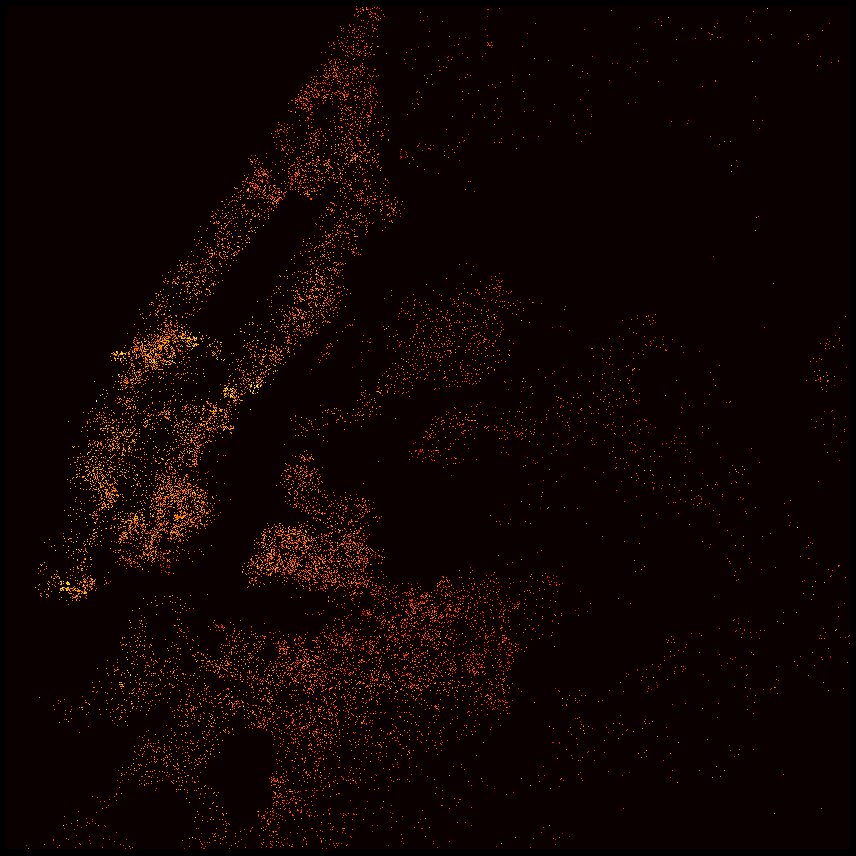

In [12]:
nrbins = 1250
spread = 0.1
hist = np.zeros((nrbins,nrbins))

# Compute the histogram with the longitude and latitude data as a source
hist, x_ranges, y_ranges  = np.histogram2d(x=nlat, y=nlon, bins=nrbins, 
                                          range = [[lon_mid - spread, lon_mid + spread], [lat_mid - spread, lat_mid + spread]])

# We consider the counts on a logarithmic scale
img = np.log(hist[::-1,:] + 1)

# Plot the counts
pp.figure(figsize=(12,12), facecolor='black')
ax = pp.subplot(1,1,1)
pp.imshow(img, 'hot')
pp.axis('off')
pp.tight_layout()
pp.savefig('airbnb.png', dpi=199)